In [1]:
# K nearest neighbors
# Using Scikit-Learn
# Data - Breast Cancer Wisconsin (Diagnostic) Data Set
# Predict whether the cancer is benign or malignant

In [2]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [3]:
# Import dataset

screening_data = pd.read_csv(r'C:\Users\Yuliya.DESKTOP-FMS37R3\Documents\Data_Science\Projects\Machine Learning Models\datasets\breast_cancer_diagnostic.csv')

In [4]:
# Review dataset

def review_dataset(df):
    print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
    print(f'The column names are: {list(df.columns)}')
    print(f'There are {df.isna().sum().sum()} missing values')
    print(f'There are {df.duplicated().sum()} duplicate rows')
    print(f'\nThe first 5 rows of dataset:')
    display(df.head(5))
    print(f'\nReview columns and data types')
    display(df.info())
    print('\nSummary statustics: ')
    display(df.describe())


In [5]:
review_dataset(screening_data)

The dataset has 569 rows and 33 columns
The column names are: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
There are 569 missing values
There are 0 duplicate rows

The first 5 rows of dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Review columns and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64


None


Summary statustics: 


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# Clean dataset

# Set id column as index
screening_data.set_index('id', inplace = True)

# Drop empty column
screening_data.drop("Unnamed: 32", axis = 1, inplace = True)

# Encode target classes 
screening_data['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)

# Rearrange columns to put diagnosis column last 
screening_data = screening_data.loc[:,['radius_mean', 'texture_mean', 'perimeter_mean',
'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']]

print(f'Data size {screening_data.shape}')


Data size (569, 31)


In [23]:
# Check if the classes are balanced
screening_data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

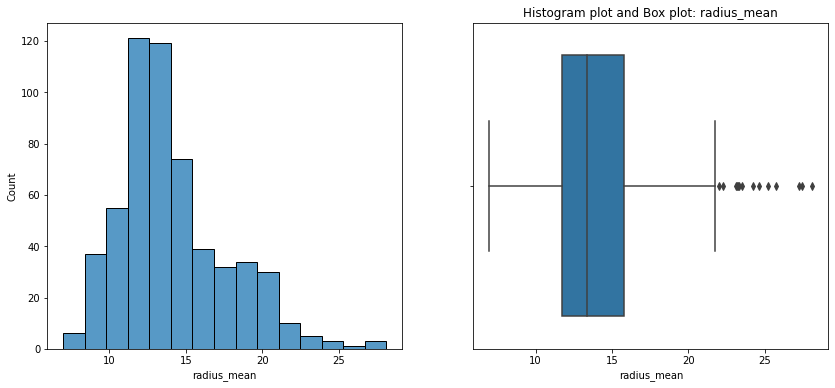

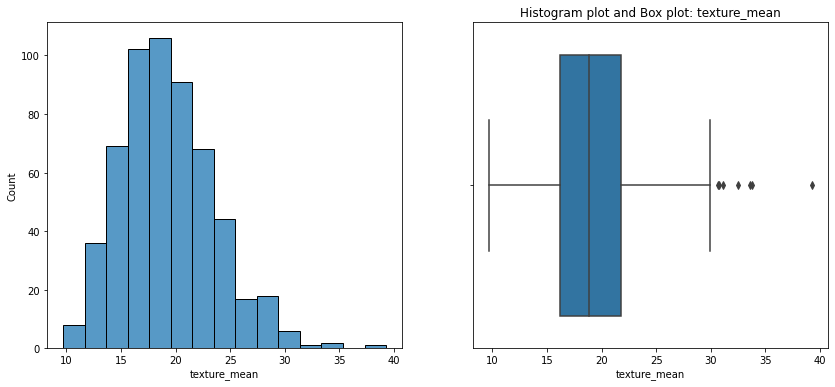

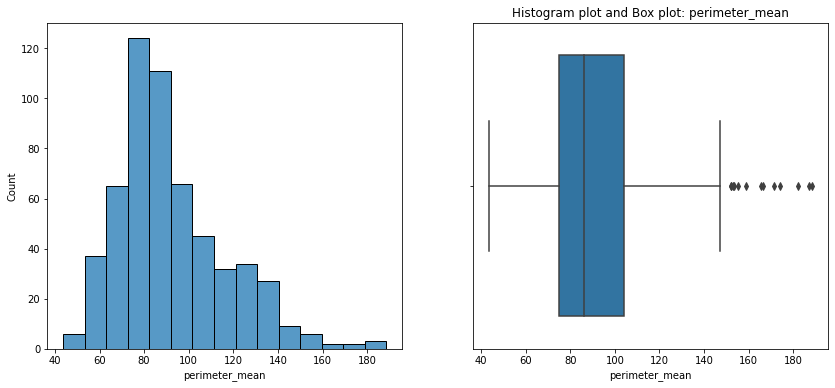

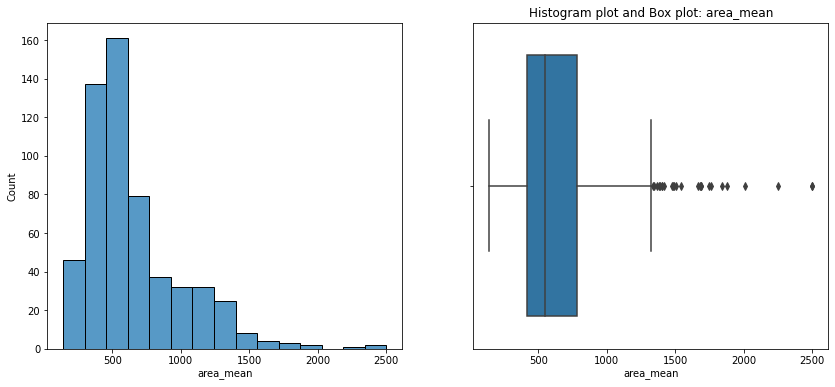

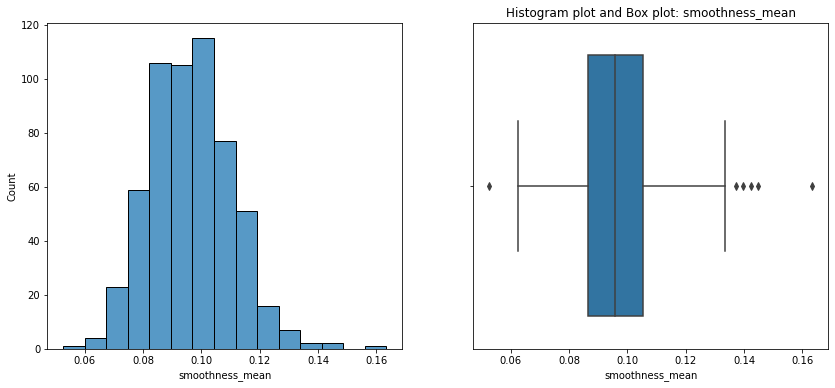

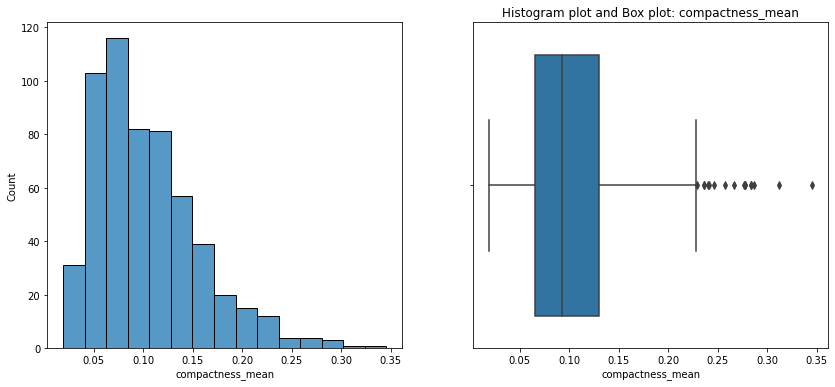

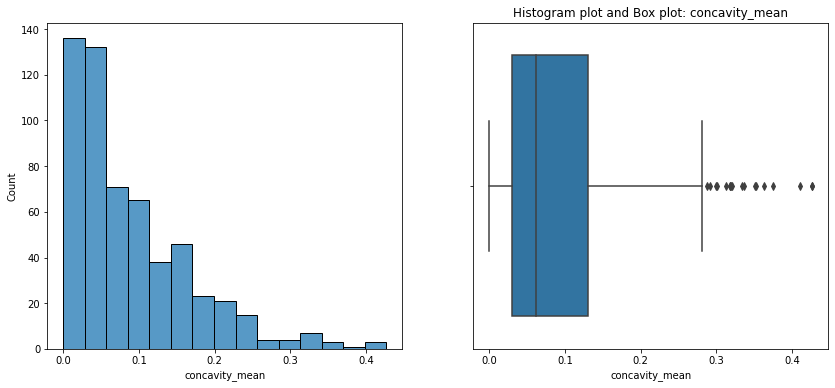

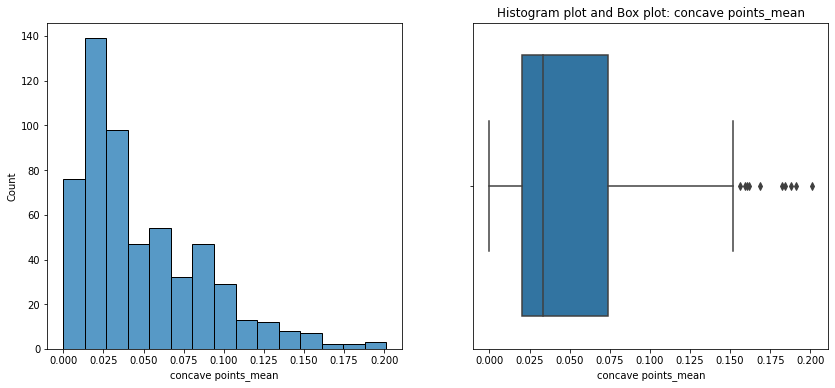

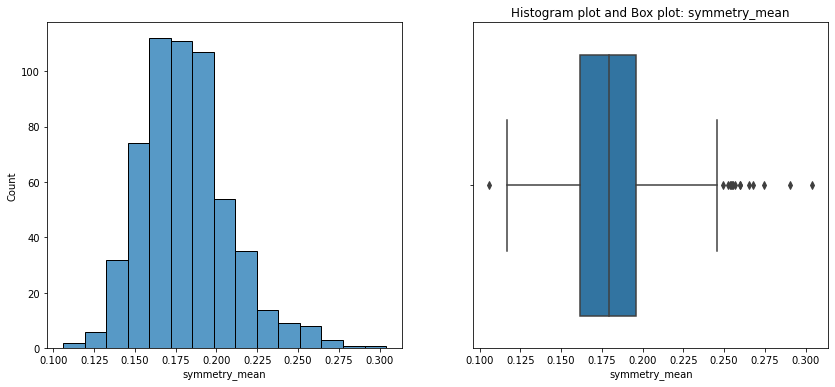

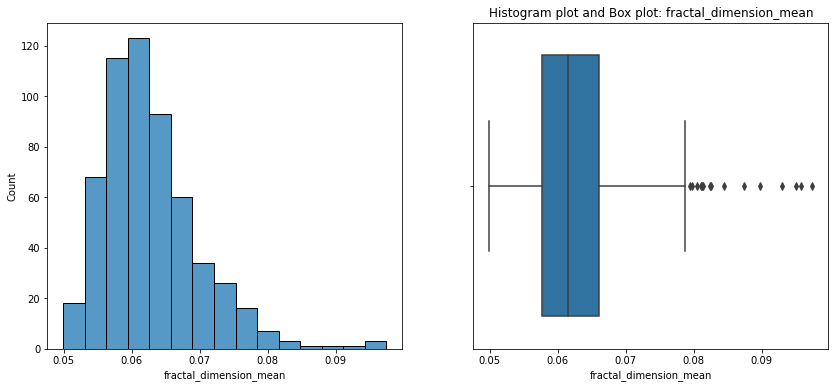

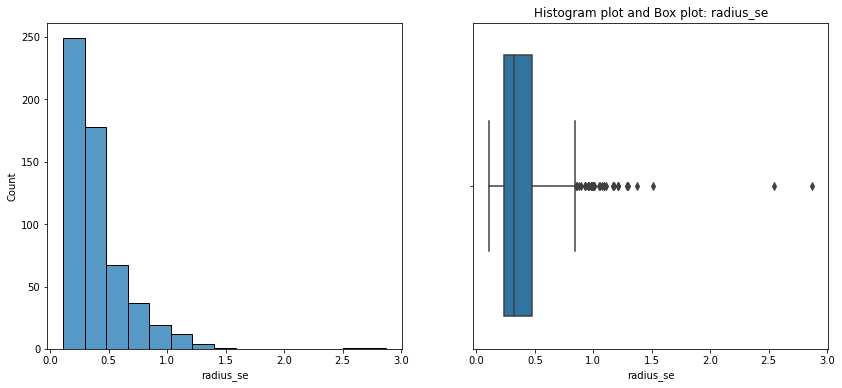

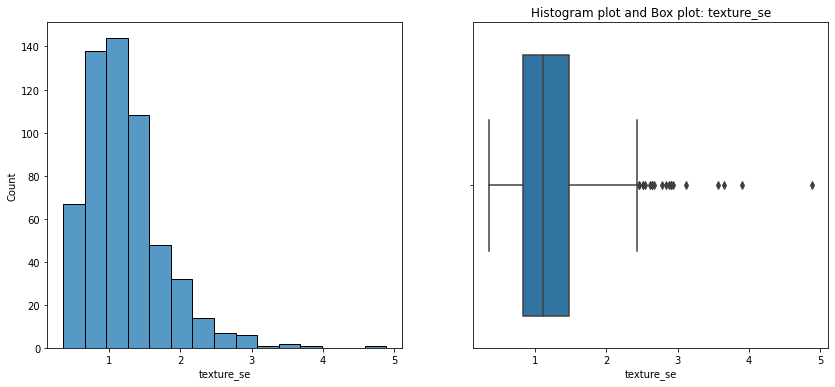

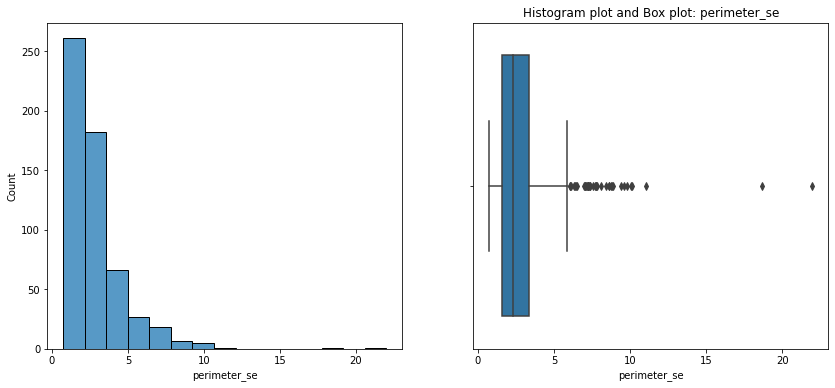

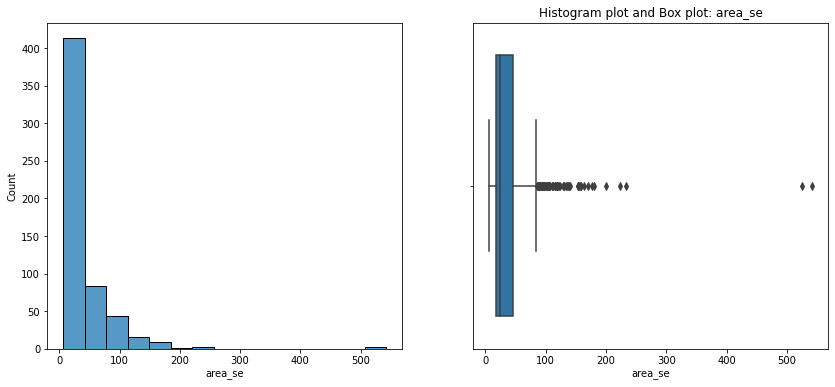

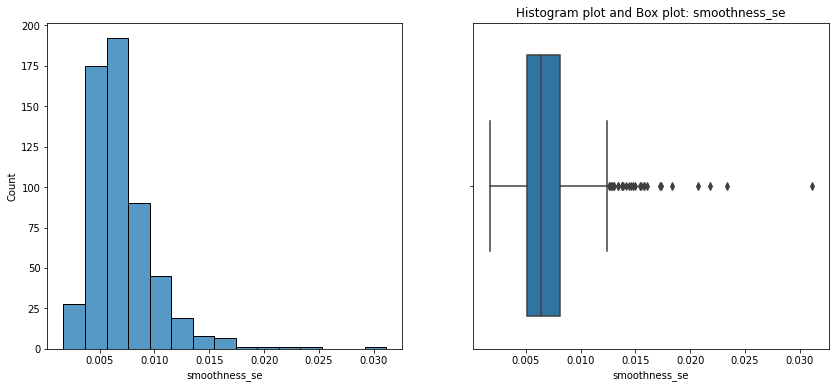

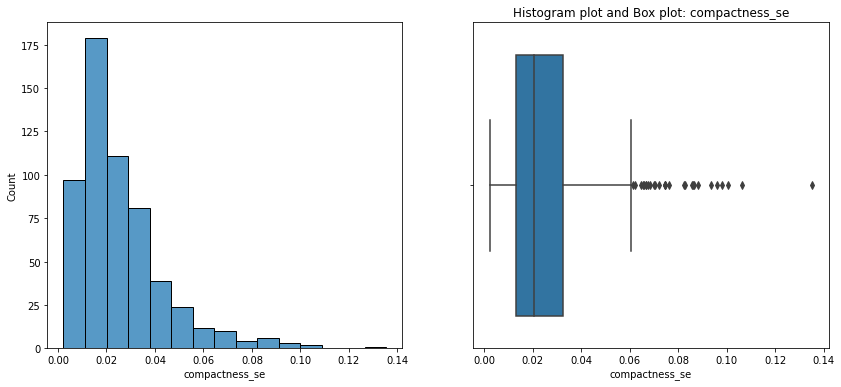

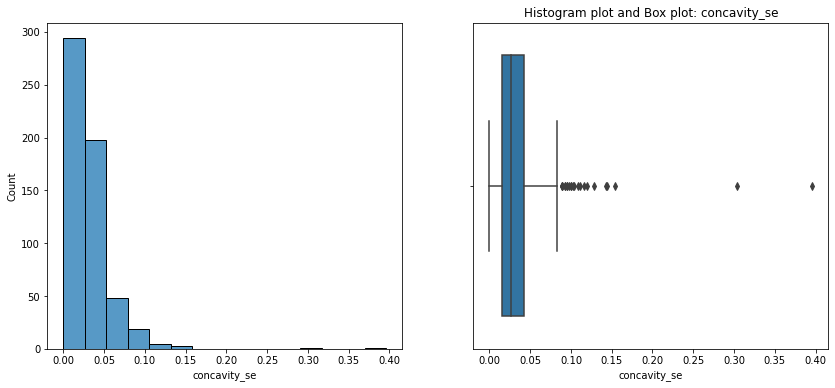

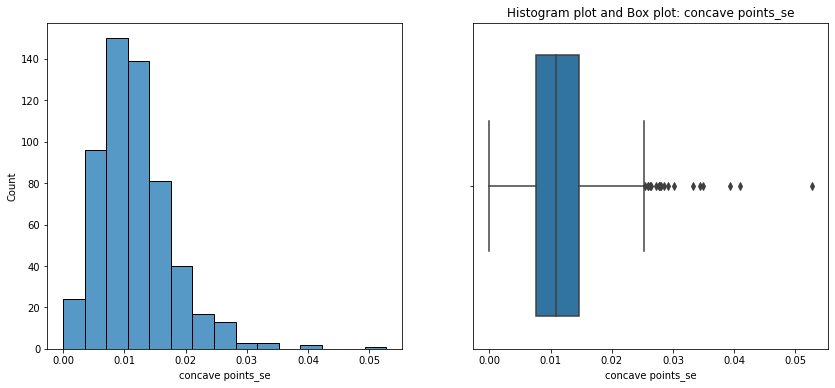

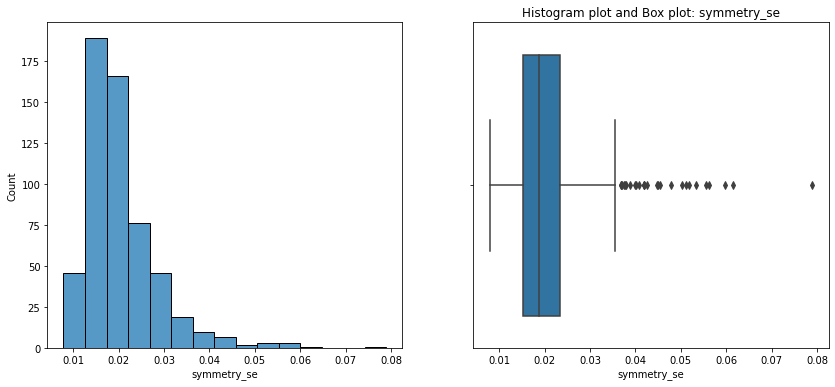

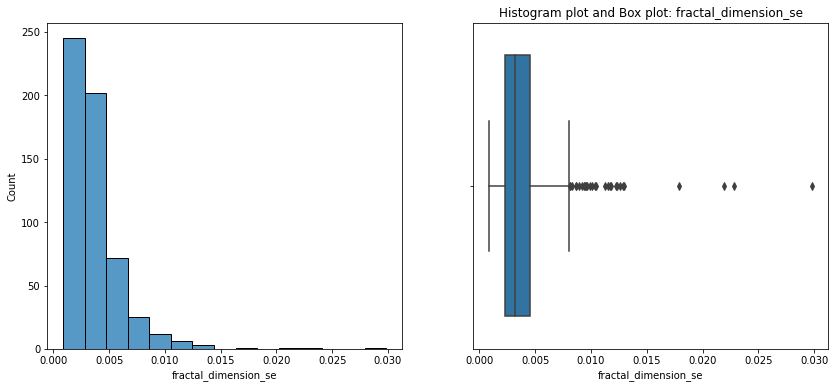

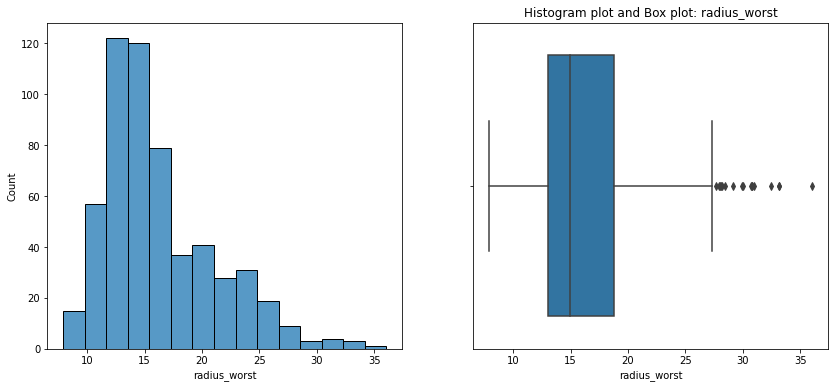

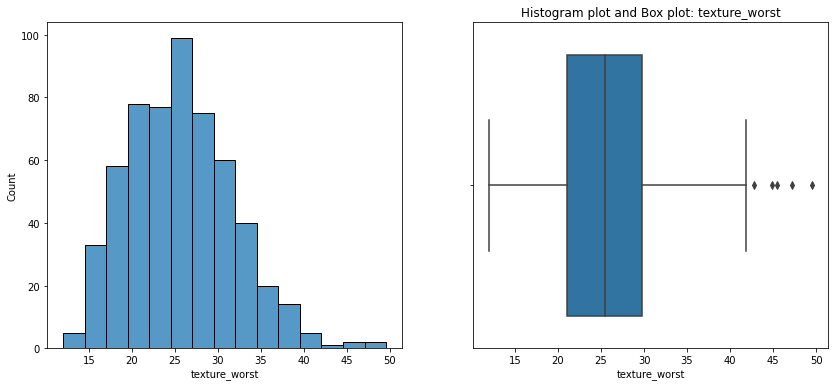

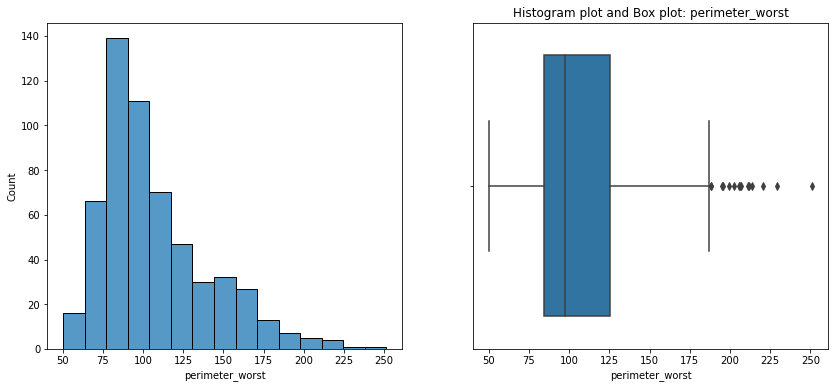

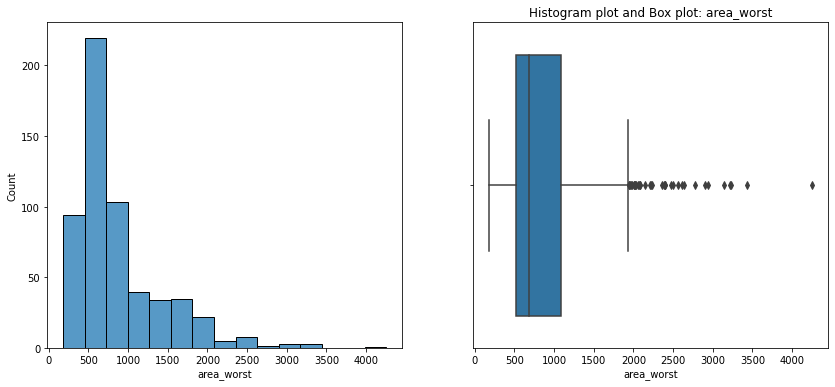

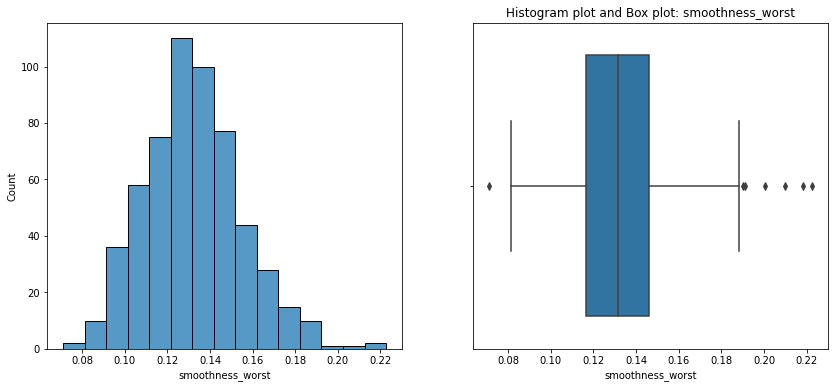

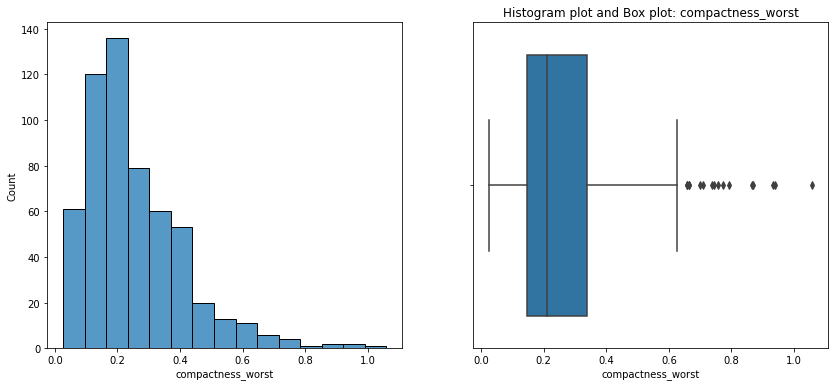

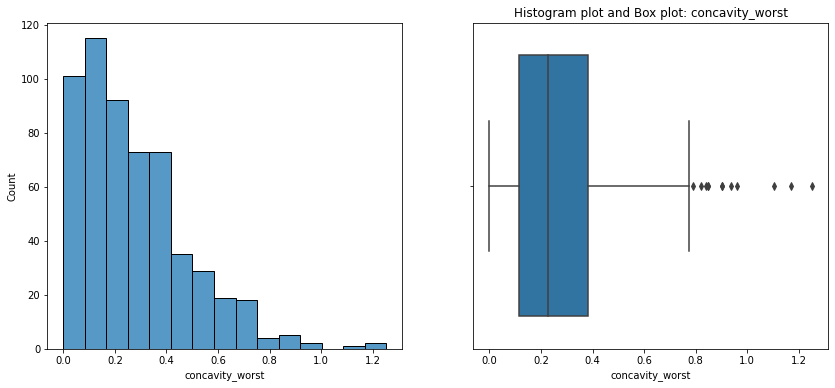

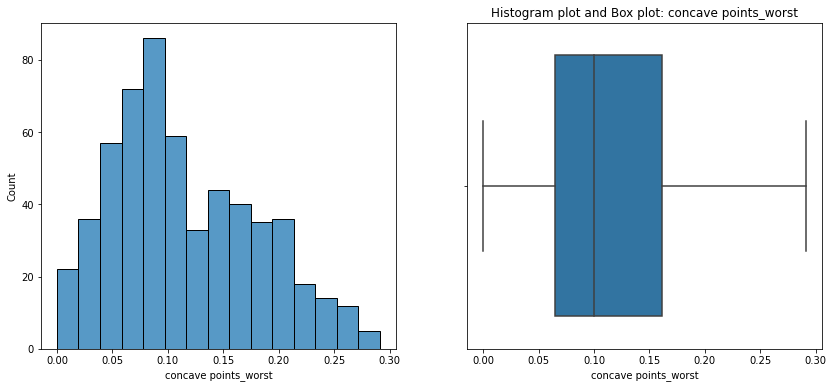

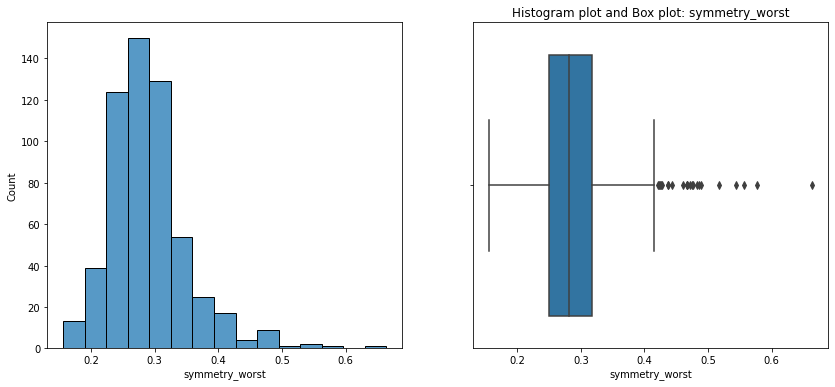

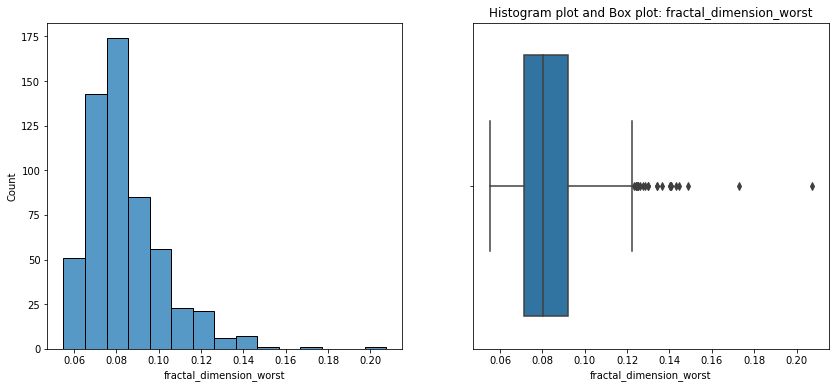

In [7]:
# Plotting the histogram and boxplot plots for all the numerical columns

# Getting the list of numerical/float columns except the target column 'target'
list_num_cols = list(screening_data.columns[:-1])

# For loop to create histogram and boxplot plots for each of the columns in 'list_num_cols'
for col in list_num_cols:
    #print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
    plt.title(f"Histogram plot and Box plot: {col}")
    sns.histplot(screening_data[col], ax=ax1, bins = 15)
    sns.boxplot(x = screening_data[col], ax = ax2)
    
    plt.show()

In [8]:
# Split the data into features (X) and target (y)
X =  screening_data.drop('diagnosis', axis=1)
y =  screening_data['diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# fit the model 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [10]:
# making prediction
y_pred = knn.predict(X_test)

In [11]:
# checking accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))

Accuracy: 0.9649


In [12]:
# Improve accuracy by trying different values for K 

k_values = [i for i in range (1,32)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    

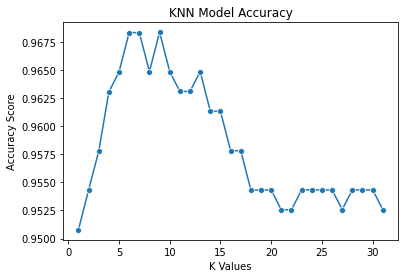

In [13]:
# Plot K values and accuracy of predictions
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.title("KNN Model Accuracy")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()


In [14]:
# Identify the best K values and train model using the best k value 
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [15]:
y_pred = knn.predict(X_test)

In [16]:
# Check accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))

Accuracy: 0.9825


In [17]:
# Evaluating Algorithm 
# Confusion matrix,  precision, recall, and f1 score. 

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Accuracy: 0.9825
Precision: 1.0
Recall: 0.9535


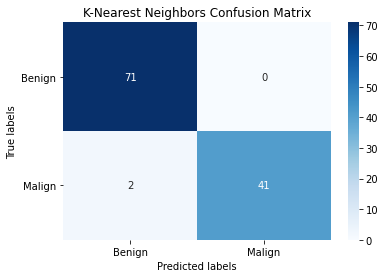

<Figure size 1440x960 with 0 Axes>

In [19]:
# Confusion matrix visualization 
cm_knn = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
plt.figure(dpi=240)
sns.heatmap(cm_knn, annot=True, ax = ax, fmt='g', cmap='Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('K-Nearest Neighbors Confusion Matrix')
labels = ['Benign', 'Malign']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360)
plt.show()

In [26]:
# Confusion matrix and Classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = ['Benign', 'Malign']))

[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
      Malign       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [21]:
# ROC curve, AUC

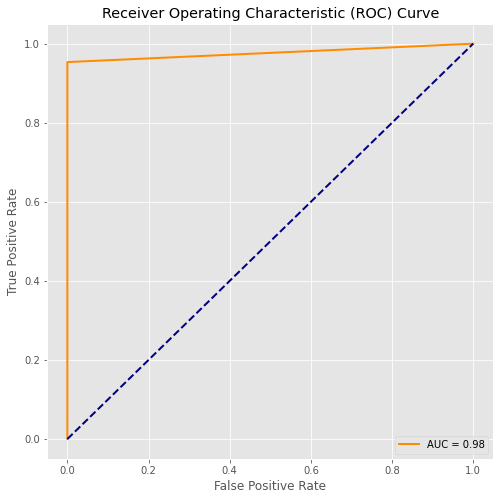

In [22]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 8))
plt.style.use('ggplot')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()